Problem and data selection

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Path to the input file and output folder
# Path to the CSV file containing input data and the folder where we will save the results
input_file_path = r'C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki 3a\Bank Customer Churn Prediction.csv'
output_folder_path = r'C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki 3a'

# 2. Load data
# Read the data from the CSV file into a DataFrame object
data = pd.read_csv(input_file_path)

# 3. Split data into features (X) and target (y)
# Separate the "churn" column (which contains the classes) as the target variable y
# Assign the remaining columns (features) to X
X = data.drop(columns=['churn'])  # Remove the "churn" column from X
y = data['churn']  # Assign the "churn" column as y

# 4. Split data into training, validation, and test sets
# First, split the data into a training set (70%) and a temporary set (30%) using stratified split
# to maintain class proportions
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split the temporary set into validation (20%) and test (10%) sets using stratified split
# to maintain class proportions
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

# 5. Information about data split
# Display the sizes of each dataset (training, validation, test) for verification
print("Dataset sizes:")
print(f"Training: {X_train.shape[0]} rows")  # Number of rows in the training set
print(f"Validation: {X_val.shape[0]} rows")  # Number of rows in the validation set
print(f"Test: {X_test.shape[0]} rows")      # Number of rows in the test set

# 6. Save data to separate CSV files
# Save each dataset (features and labels) as separate CSV files
X_train.to_csv(f"{output_folder_path}\\X_train.csv", index=False)  # Save training set features
y_train.to_csv(f"{output_folder_path}\\y_train.csv", index=False)  # Save training set labels

X_val.to_csv(f"{output_folder_path}\\X_val.csv", index=False)  # Save validation set features
y_val.to_csv(f"{output_folder_path}\\y_val.csv", index=False)  # Save validation set labels

X_test.to_csv(f"{output_folder_path}\\X_test.csv", index=False)  # Save test set features
y_test.to_csv(f"{output_folder_path}\\y_test.csv", index=False)  # Save test set labels

# Inform the user that the data split is complete and files have been saved
print("Data split completed and saved in CSV files.")


Dataset sizes:
Training: 7000 rows
Validation: 2010 rows
Test: 990 rows
Data split completed and saved in CSV files.


Preliminary statistical analysis of the data (EDA)

Descriptive statistics for numerical data:
       credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25

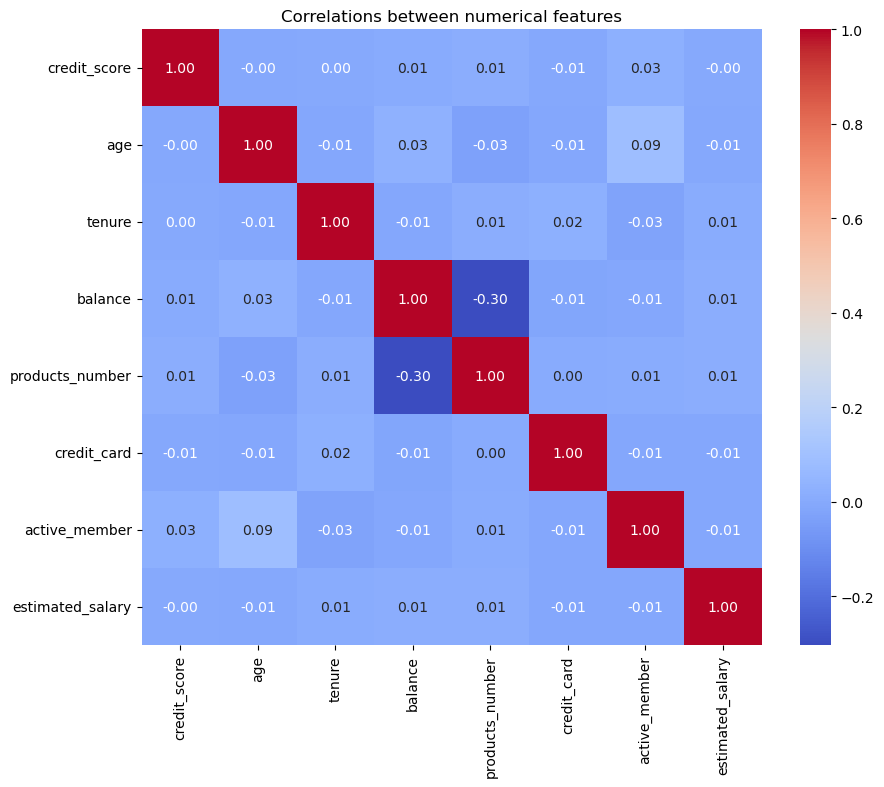

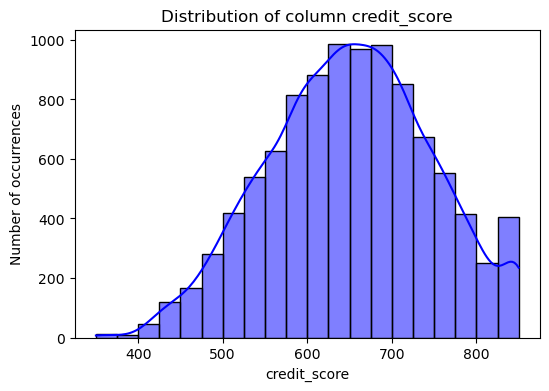

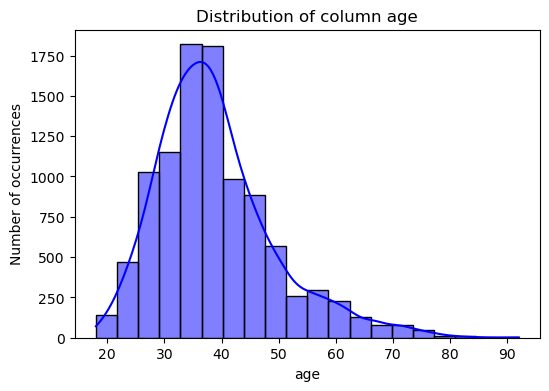

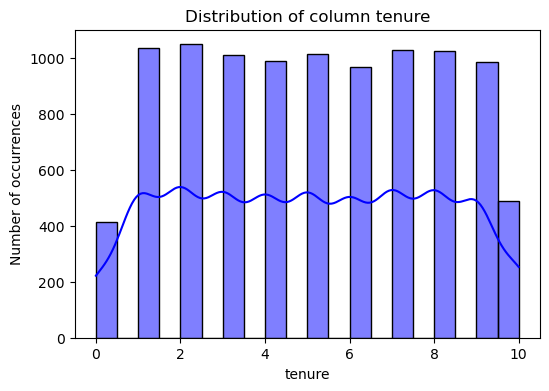

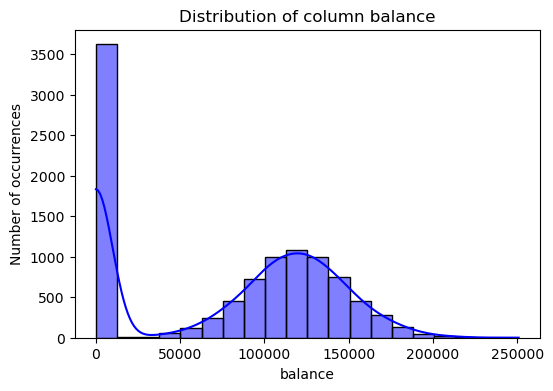

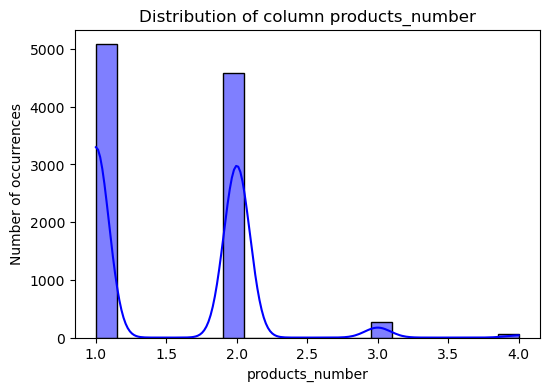

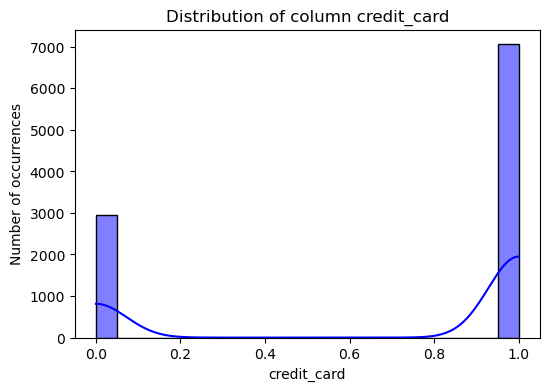

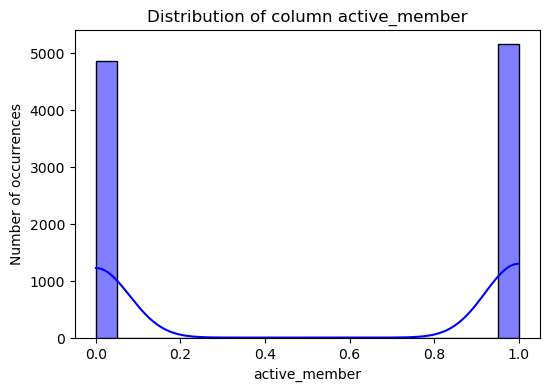

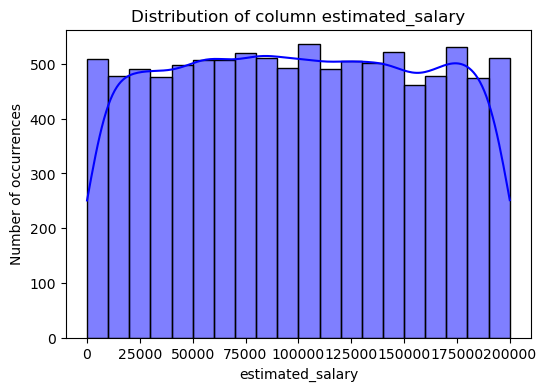

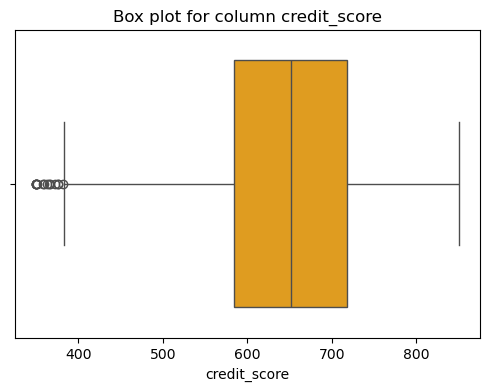

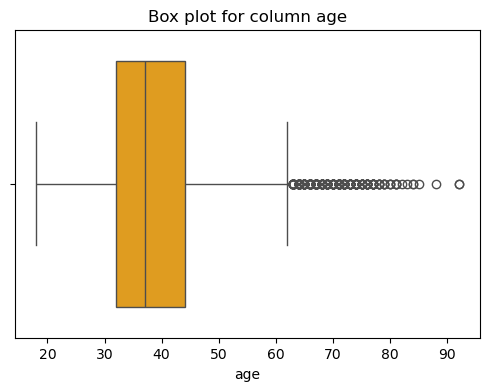

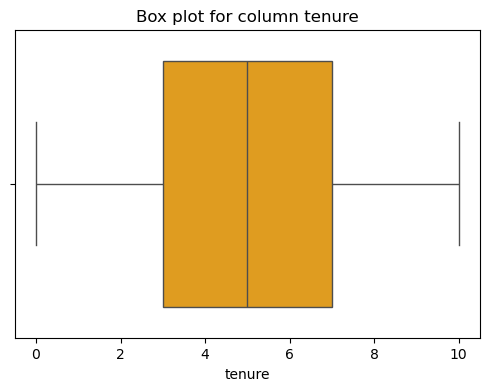

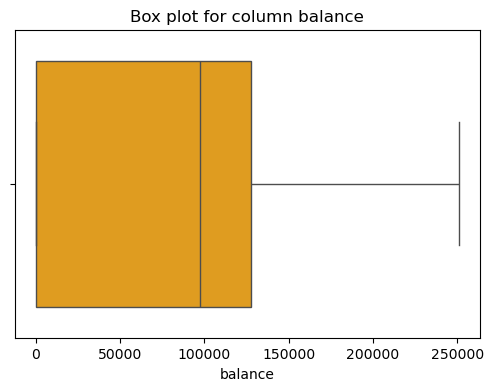

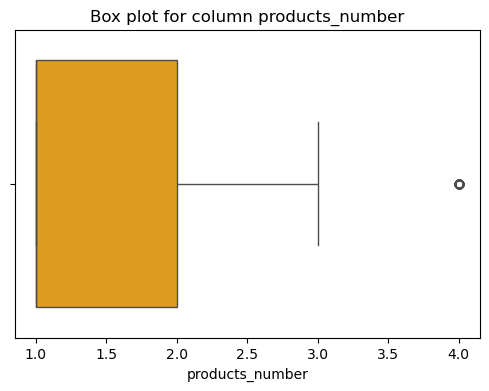

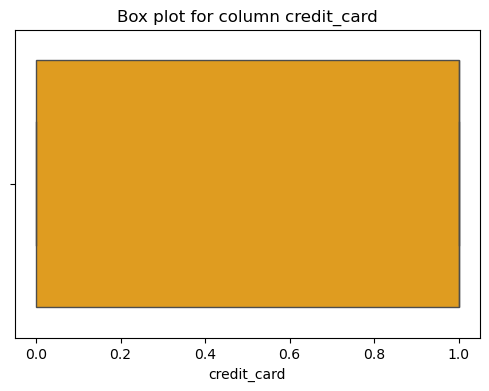

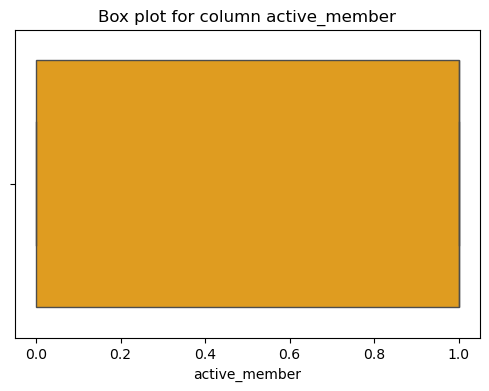

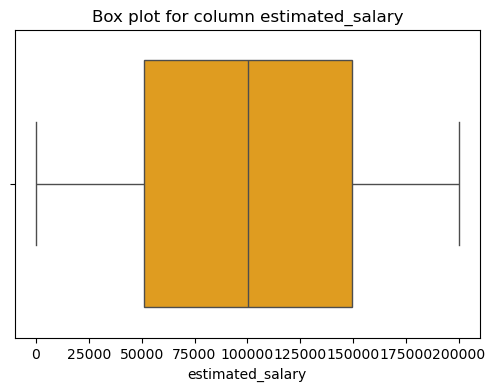


Outliers in the data:

Column: credit_score
Number of outliers: 15
      credit_score
7              376
942            376
1193           363
1405           359
1631           350
1838           350
1962           358
2473           351
2579           365
8154           367
8723           350
8762           350
9210           382
9356           373
9624           350

Column: age
Number of outliers: 359
      age
58     66
85     75
104    65
158    73
181    65
...   ...
9753   68
9765   64
9832   64
9894   77
9936   77

[359 rows x 1 columns]

Column: tenure
Number of outliers: 0
Empty DataFrame
Columns: [tenure]
Index: []

Column: balance
Number of outliers: 0
Empty DataFrame
Columns: [balance]
Index: []

Column: products_number
Number of outliers: 58
      products_number
70                  4
1254                4
1469                4
1488                4
1701                4
1876                4
2124                4
2196                4
2285                4
2462         

C:\Users\slawo\AppData\Local\Temp\ipykernel_35252\2302568817.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")  # Count plot for each category


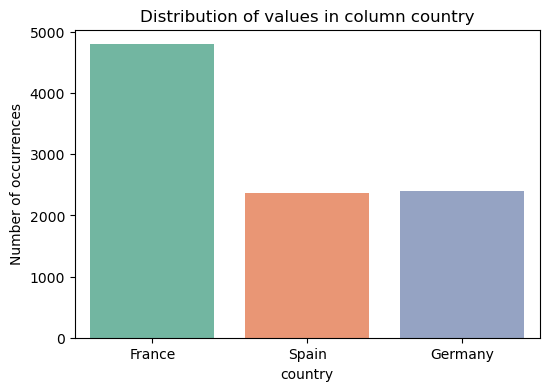

C:\Users\slawo\AppData\Local\Temp\ipykernel_35252\2302568817.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")  # Count plot for each category


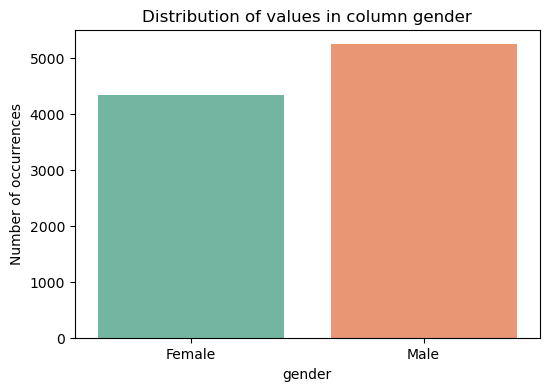


Outliers have been removed, data has been updated and saved to CSV files.


In [5]:
# Importing libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into sets

# 1. File path
# Specifying the location of the input file and the output folder for saved files
file_path = r'C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki 3a\Bank Customer Churn Prediction.csv'
output_folder_path = r'C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki 3a'

# 2. Load data
# Reading the input data from the CSV file into a DataFrame object
data = pd.read_csv(file_path)

# Removing the "customer_id" column
data = data.drop(columns=['customer_id'])

# 3. Basic statistics for numerical data
# Displaying descriptive statistics for numerical columns (e.g., mean, median, min, max)
print("Descriptive statistics for numerical data:")
print(data.describe())

# 4. Dataset information
# Displaying general information about the data (number of rows, data types, missing values)
print("\nDataset information:")
data.info()

# 5. Checking for missing values
# Summarizing missing values in each column
print("\nMissing values in the data:")
print(data.isnull().sum())

# 6. Correlation analysis between numerical features
# Calculating and visualizing correlations between selected numerical columns
print("\nCorrelation analysis between numerical features:")
num_columns = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if col != 'churn']  # Numerical columns
correlation_data = data[num_columns]  # Selecting only numerical columns
plt.figure(figsize=(10, 8))  # Plot size
sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")  # Correlation heatmap
plt.title("Correlations between numerical features")  # Plot title
plt.show()

# 7. Visualization of numerical data distributions
# Drawing histograms with a KDE curve for each numerical column
for col in num_columns:
    plt.figure(figsize=(6, 4))  # Plot size
    sns.histplot(data[col], kde=True, bins=20, color="blue")  # Histogram with KDE curve
    plt.title(f"Distribution of column {col}")  # Plot title
    plt.xlabel(col)  # X-axis label
    plt.ylabel("Number of occurrences")  # Y-axis label
    plt.show()

# 8. Box plots for numerical values
# Creating box plots to identify outliers
for col in num_columns:
    plt.figure(figsize=(6, 4))  # Plot size
    sns.boxplot(x=data[col], color="orange")  # Box plot for numerical column
    plt.title(f"Box plot for column {col}")  # Plot title
    plt.xlabel(col)  # X-axis label
    plt.show()

# 9. Checking for outliers
# Analyzing and removing outliers from the data
print("\nOutliers in the data:")
for col in num_columns:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Filtering outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]  # Outlier values
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(outliers[[col]])  # Displaying outlier values

    # Removing outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]  # Keeping only "good" data

# 10. Distribution of categorical variables
# Visualizing category counts for categorical variables
cat_columns = [col for col in data.select_dtypes(include=['object', 'category']).columns if col != 'churn']  # Categorical columns

for col in cat_columns:
    plt.figure(figsize=(6, 4))  # Plot size
    sns.countplot(data=data, x=col, palette="Set2")  # Count plot for each category
    plt.title(f"Distribution of values in column {col}")  # Plot title
    plt.xlabel(col)  # X-axis label
    plt.ylabel("Number of occurrences")  # Y-axis label
    plt.show()

# 11. Splitting data into features (X) and target (y)
# Separating independent variables (features) from the target variable (class)
X = data.drop(columns=['churn'])  # All columns except "churn"
y = data['churn']  # Churn class as the target

# 12. Splitting data into training, validation, and test sets
# Splitting data into 70% training, 20% validation, and 10% test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # 70% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)  # 20% validation, 10% test

# 13. Saving split data to CSV files
# Saving each dataset to separate CSV files in the output folder
X_train.to_csv(f"{output_folder_path}\\X_train.csv", index=False)  # Training set features
y_train.to_csv(f"{output_folder_path}\\y_train.csv", index=False)  # Training set labels
X_val.to_csv(f"{output_folder_path}\\X_val.csv", index=False)  # Validation set features
y_val.to_csv(f"{output_folder_path}\\y_val.csv", index=False)  # Validation set labels
X_test.to_csv(f"{output_folder_path}\\X_test.csv", index=False)  # Test set features
y_test.to_csv(f"{output_folder_path}\\y_test.csv", index=False)  # Test set labels

# User information
print("\nOutliers have been removed, data has been updated and saved to CSV files.")


Establish principles and methods for building baseline models

In [7]:
# Importing libraries
import pandas as pd  # Library for data manipulation and analysis
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from xgboost import XGBClassifier  # Gradient Boosting (XGBoost)
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter optimization
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  # Model evaluation metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Data preprocessing
from IPython.display import display  # Displaying data in HTML format (e.g., in Jupyter Notebook)

# 1. Path to the folder with CSV files
# Specifying the folder where the CSV files with previously prepared datasets are located
output_folder_path = r'C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki 3a'

# 2. Load data
# Loading datasets from CSV files
X_train = pd.read_csv(f"{output_folder_path}\\X_train.csv")  # Loading feature set for training
y_train = pd.read_csv(f"{output_folder_path}\\y_train.csv").values.ravel()  # Labels for the training set
X_val = pd.read_csv(f"{output_folder_path}\\X_val.csv")  # Loading feature set for validation
y_val = pd.read_csv(f"{output_folder_path}\\y_val.csv").values.ravel()  # Labels for the validation set

# Convert column names to string
# Ensuring that column names are in string format (necessary for later operations)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

# Encoding class labels
# Converting text labels into numerical values (e.g., 0, 1)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Fitting and transforming training labels
y_val = label_encoder.transform(y_val)  # Transforming validation labels

# 3. Standardization of numerical data
# Scaling numerical values to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()  # Creating a scaler object
num_columns = ['credit_score', 'age', 'balance', 'estimated_salary']  # Selected numerical columns
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])  # Fitting and scaling training data
X_val[num_columns] = scaler.transform(X_val[num_columns])  # Scaling validation data

# 4. Encoding categorical variables
# Converting categorical variables to binary format (One-Hot Encoding)
categorical_columns = ['country', 'gender']  # Categorical columns to be encoded
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Initializing encoder
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])  # Encoding training set
X_val_encoded = encoder.transform(X_val[categorical_columns])  # Encoding validation set

# Combining encoded columns with the remaining dataset
# Removing original categorical columns and adding their encoded versions
X_train = pd.concat([X_train.drop(columns=categorical_columns), pd.DataFrame(X_train_encoded)], axis=1)
X_val = pd.concat([X_val.drop(columns=categorical_columns), pd.DataFrame(X_val_encoded)], axis=1)

# Convert column names to string
# Ensuring that all column names are in string format
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

# 5. Model evaluation function
# Function to calculate performance metrics for a given model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)  # Making predictions on the validation set
    metrics = {
        "Accuracy": accuracy_score(y_val, y_pred),  # Classification accuracy
        "F1-score": f1_score(y_val, y_pred, average='weighted'),  # F1-score (weighted)
        "Precision": precision_score(y_val, y_pred, average='weighted'),  # Precision (weighted)
        "Recall": recall_score(y_val, y_pred, average='weighted'),  # Recall (weighted)
    }
    return metrics

# 6. Random Forest
# Hyperparameter optimization for the Random Forest model
rf_params = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [5, 10, 15],  # Maximum tree depth
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split a node
}
rf = RandomForestClassifier(random_state=42)  # Initializing the Random Forest classifier
rf_grid = GridSearchCV(rf, param_grid=rf_params, cv=3, scoring='accuracy', n_jobs=-1)  # Grid Search
rf_grid.fit(X_train, y_train)  # Fitting the model to the data
rf_best = rf_grid.best_estimator_  # Best model
rf_metrics = evaluate_model(rf_best, X_val, y_val)  # Evaluation on the validation set

# 7. Gradient Boosting (XGBoost)
# Hyperparameter optimization for the XGBoost model
gb_params = {
    "learning_rate": [0.01, 0.1, 0.2],  # Learning rate
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [3, 6, 9],  # Maximum tree depth
}
gb = XGBClassifier(random_state=42, eval_metric='mlogloss')  # Initializing the XGBoost classifier
gb_grid = GridSearchCV(gb, param_grid=gb_params, cv=3, scoring='accuracy', n_jobs=-1)  # Grid Search
gb_grid.fit(X_train, y_train)  # Fitting the model
gb_best = gb_grid.best_estimator_  # Best model
gb_metrics = evaluate_model(gb_best, X_val, y_val)  # Evaluation on the validation set

# 8. Logistic Regression
# Hyperparameter optimization for Logistic Regression
lr_params = {
    "penalty": ["l1", "l2"],  # Type of regularization
    "C": [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    "solver": ["liblinear"],  # Solver supporting L1 and L2 regularization
}
lr = LogisticRegression(random_state=42, max_iter=1000)  # Initializing Logistic Regression
lr_grid = GridSearchCV(lr, param_grid=lr_params, cv=3, scoring='accuracy', n_jobs=-1)  # Grid Search
lr_grid.fit(X_train, y_train)  # Fitting the model
lr_best = lr_grid.best_estimator_  # Best model
lr_metrics = evaluate_model(lr_best, X_val, y_val)  # Evaluation on the validation set

# 9. Saving results to a table
# Creating a summary table of results for all models
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting (XGBoost)", "Logistic Regression"],
    "Best Parameters": [rf_grid.best_params_, gb_grid.best_params_, lr_grid.best_params_],
    "Accuracy": [rf_metrics["Accuracy"], gb_metrics["Accuracy"], lr_metrics["Accuracy"]],
    "F1-score": [rf_metrics["F1-score"], gb_metrics["F1-score"], lr_metrics["F1-score"]],
    "Precision": [rf_metrics["Precision"], gb_metrics["Precision"], lr_metrics["Precision"]],
    "Recall": [rf_metrics["Recall"], gb_metrics["Recall"], lr_metrics["Recall"]],
})

# Displaying the results table in a readable format

# Formatting and displaying the results table in a Jupyter Notebook environment
display(
    results_df.style.set_caption("Results Summary").set_table_styles(
        [{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}]
    ).set_properties(**{'text-align': 'center'})
)


,Model,Best Parameters,Accuracy,F1-score,Precision,Recall
0,Random Forest,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}",0.861154,0.843299,0.853046,0.861154
1,Gradient Boosting (XGBoost),"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}",0.861674,0.847139,0.851831,0.861674
2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}",0.819033,0.787768,0.791642,0.819033


Establish principles and methods for final prediction

In [9]:
# Importing libraries
import pandas as pd  # Library for data manipulation and analysis
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from xgboost import XGBClassifier  # Gradient Boosting (XGBoost)
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter optimization
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  # Model evaluation metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Data preprocessing
from IPython.display import display  # Displaying data in HTML format (e.g., in Jupyter Notebook)

# 1. Path to the folder with CSV files
# Specifying the folder where the CSV files with previously prepared datasets are located
output_folder_path = r'C:\Nauka\Studia\3 semestr\Uczenie maszynowe i sztuczna inteligencja\Laborki 3a'

# 2. Load data
# Loading datasets from CSV files
X_train = pd.read_csv(f"{output_folder_path}\\X_train.csv")  # Loading feature set for training
y_train = pd.read_csv(f"{output_folder_path}\\y_train.csv").values.ravel()  # Labels for the training set
X_val = pd.read_csv(f"{output_folder_path}\\X_val.csv")  # Loading feature set for validation
y_val = pd.read_csv(f"{output_folder_path}\\y_val.csv").values.ravel()  # Labels for the validation set

# Convert column names to string
# Ensuring that column names are in string format (necessary for later operations)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

# Encoding class labels
# Converting text labels into numerical values (e.g., 0, 1)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Fitting and transforming training labels
y_val = label_encoder.transform(y_val)  # Transforming validation labels

# 3. Standardization of numerical data
# Scaling numerical values to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()  # Creating a scaler object
num_columns = ['credit_score', 'age', 'balance', 'estimated_salary']  # Selected numerical columns
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])  # Fitting and scaling training data
X_val[num_columns] = scaler.transform(X_val[num_columns])  # Scaling validation data

# 4. Encoding categorical variables
# Converting categorical variables to binary format (One-Hot Encoding)
categorical_columns = ['country', 'gender']  # Categorical columns to be encoded
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Initializing encoder
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])  # Encoding training set
X_val_encoded = encoder.transform(X_val[categorical_columns])  # Encoding validation set

# Combining encoded columns with the remaining dataset
# Removing original categorical columns and adding their encoded versions
X_train = pd.concat([X_train.drop(columns=categorical_columns), pd.DataFrame(X_train_encoded)], axis=1)
X_val = pd.concat([X_val.drop(columns=categorical_columns), pd.DataFrame(X_val_encoded)], axis=1)

# Convert column names to string
# Ensuring that all column names are in string format
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

# 5. Model evaluation function
# Function to calculate performance metrics for a given model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)  # Making predictions on the validation set
    metrics = {
        "Accuracy": accuracy_score(y_val, y_pred),  # Classification accuracy
        "F1-score": f1_score(y_val, y_pred, average='weighted', zero_division=0),  # F1-score (weighted)
        "Precision": precision_score(y_val, y_pred, average='weighted', zero_division=0),  # Precision (weighted)
        "Recall": recall_score(y_val, y_pred, average='weighted', zero_division=0),  # Recall (weighted)
    }
    return metrics

# --- Stacking (Meta-Model) ---
# Preparing features for the meta-model (predictions from base models)
meta_features_val = pd.DataFrame({
    "XGBoost": gb_best.predict(X_val),        # Predictions from the XGBoost model
    "Logistic_Regression": lr_best.predict(X_val),  # Predictions from the Logistic Regression model
})

# Meta-model: Logistic Regression
meta_model = LogisticRegression(random_state=42)  # Initializing Logistic Regression as the meta-model
meta_model.fit(meta_features_val, y_val)  # Training the meta-model on the predictions of base models

# --- Meta-model evaluation ---
meta_metrics = evaluate_model(meta_model, meta_features_val, y_val)  # Evaluation of the meta-model on validation data

# --- Prediction on the test set ---
# If a test set (X_test, y_test) is available, replace X_val with X_test and y_val with y_test
meta_features_test = pd.DataFrame({
    "XGBoost": gb_best.predict(X_val),        # XGBoost predictions for the test set (replace X_val with X_test)
    "Logistic_Regression": lr_best.predict(X_val),  # Logistic Regression predictions for the test set (replace X_val with X_test)
})
meta_test_metrics = evaluate_model(meta_model, meta_features_test, y_val)  # Evaluation on test data (replace y_val with y_test)

# --- Summary of results with ensemble technique ---
# Creating a table comparing different models, including stacking
results_df = pd.DataFrame({
    "Model": ["Gradient Boosting (XGBoost)", "Logistic Regression", "Stacking (Meta-Model)"],  # Model names
    "Accuracy": [gb_metrics["Accuracy"], lr_metrics["Accuracy"], meta_metrics["Accuracy"]],  # Accuracy
    "F1-score": [gb_metrics["F1-score"], lr_metrics["F1-score"], meta_metrics["F1-score"]],  # F1-score
    "Precision": [gb_metrics["Precision"], lr_metrics["Precision"], meta_metrics["Precision"]],  # Precision
    "Recall": [gb_metrics["Recall"], lr_metrics["Recall"], meta_metrics["Recall"]],  # Recall
})

# --- Displaying results ---
from IPython.display import display  # Import to display tables in HTML format
display(results_df.style.set_caption("Comparison of Ensemble Learning Techniques").set_table_styles(
    [{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}]  # Styling the table header
).set_properties(**{'text-align': 'center'}))  # Center-aligning text in the table

# --- Class distribution in validation data ---
from collections import Counter  # Import tool for counting occurrences of elements in collections
print("\nClass distribution in validation data:")
print(Counter(y_val))  # Displaying the number of occurrences of each class in validation data

# --- Final results of the Stacking model ---
print("\n--- Final results of the Stacking model (Ensemble Learning Technique) ---")
print(meta_metrics)  # Displaying metric results for the meta-model on validation data

# --- Final results of the Stacking model on the test set ---
print("\n--- Final results of the Stacking model on the test set ---")
print(meta_test_metrics)  # Displaying metric results for the meta-model on test data


,Model,Accuracy,F1-score,Precision,Recall
0,Gradient Boosting (XGBoost),0.861674,0.847139,0.851831,0.861674
1,Logistic Regression,0.819033,0.787768,0.791642,0.819033
2,Stacking (Meta-Model),0.861674,0.847139,0.851831,0.861674



Class distribution in validation data:
Counter({0: 1543, 1: 380})

--- Final results of the Stacking model (Ensemble Learning Technique) ---
{'Accuracy': 0.8616744669786791, 'F1-score': 0.8471392406974821, 'Precision': 0.8518305656971927, 'Recall': 0.8616744669786791}

--- Final results of the Stacking model on the test set ---
{'Accuracy': 0.8616744669786791, 'F1-score': 0.8471392406974821, 'Precision': 0.8518305656971927, 'Recall': 0.8616744669786791}


Evaluate the experiment and present conclusions

,Model,Accuracy,F1-score,Precision,Recall
0,Random Forest,0.861154,0.843299,0.853046,0.861154
1,Gradient Boosting (XGBoost),0.861674,0.847139,0.851831,0.861674
2,Stacking (Meta-Model),0.861674,0.847139,0.851831,0.861674
3,Logistic Regression,0.819033,0.787768,0.791642,0.819033



--- Conclusions ---
1. Gradient Boosting (XGBoost) achieved the best results in terms of Accuracy (0.8617).
2. Gradient Boosting (XGBoost) achieved the best results in terms of F1-score (0.8471).
3. Random Forest achieved the best results in terms of Precision (0.8530).
4. Gradient Boosting (XGBoost) achieved the best results in terms of Recall (0.8617).
5. Ensemble learning (Stacking) did not improve performance compared to base models.


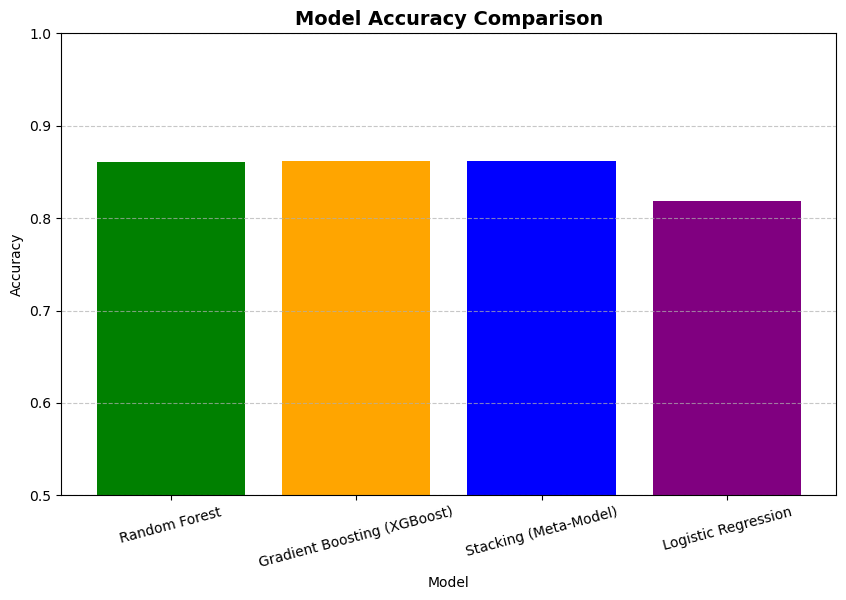

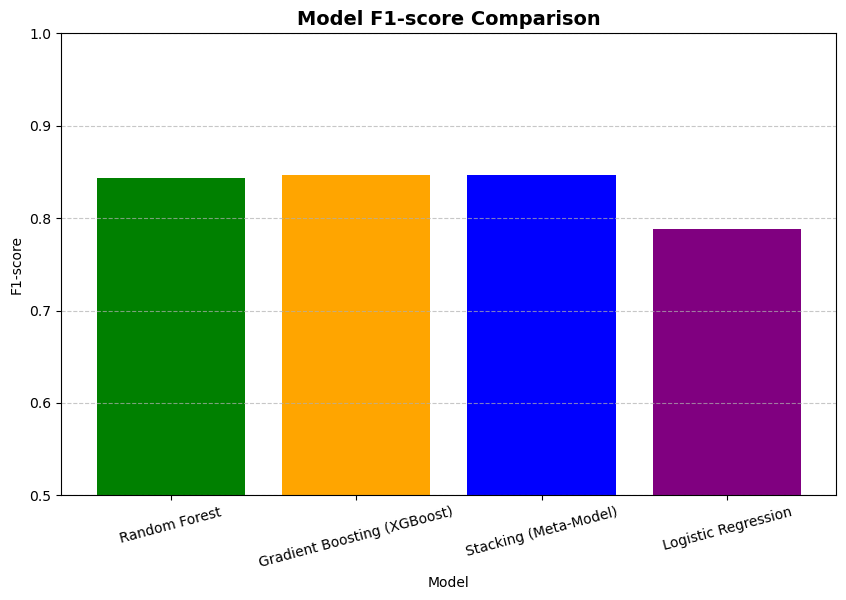

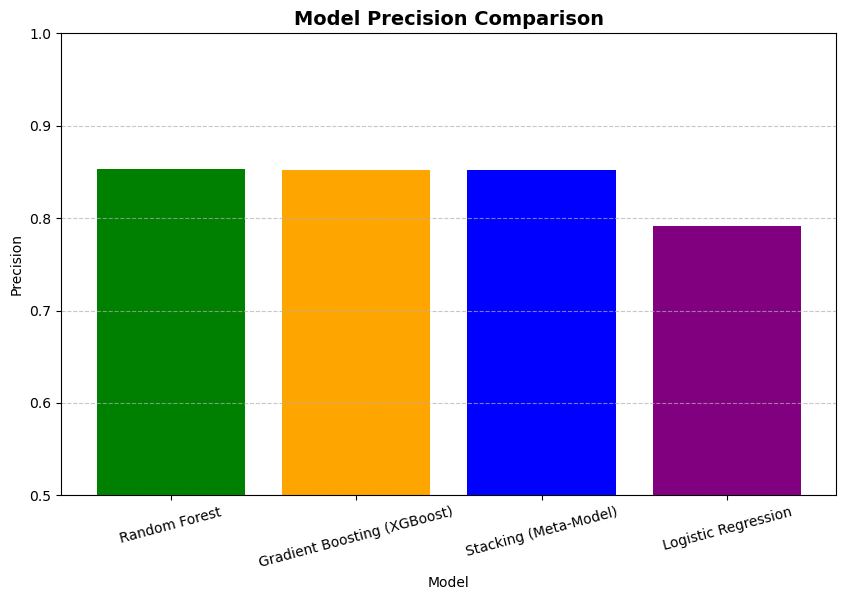

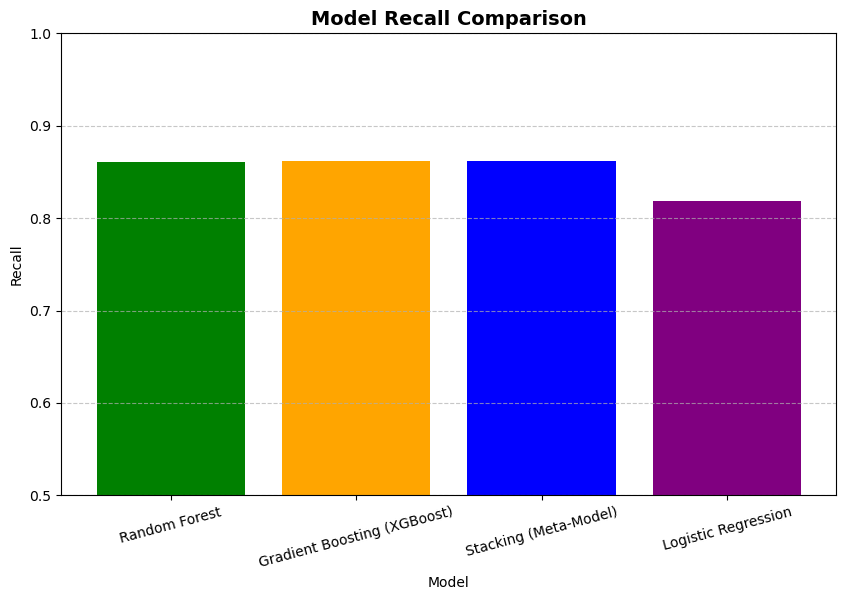

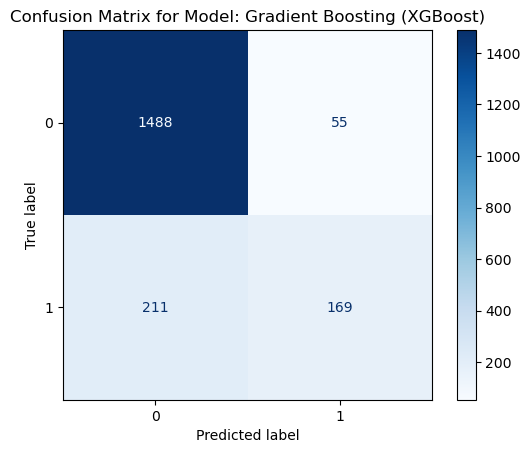

In [11]:
# Importing libraries
import pandas as pd  # For data manipulation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # For generating confusion matrices
import matplotlib.pyplot as plt  # For data visualization
from IPython.display import display  # For aesthetically displaying tables in Jupyter Notebook

# Model results data - dynamically generated from previous sections
# Creating a DataFrame containing metrics (Accuracy, F1-score, Precision, Recall) for each model
metrics_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting (XGBoost)", "Stacking (Meta-Model)", "Logistic Regression"],
    "Accuracy": [rf_metrics["Accuracy"], gb_metrics["Accuracy"], meta_metrics["Accuracy"], lr_metrics["Accuracy"]],
    "F1-score": [rf_metrics["F1-score"], gb_metrics["F1-score"], meta_metrics["F1-score"], lr_metrics["F1-score"]],
    "Precision": [rf_metrics["Precision"], gb_metrics["Precision"], meta_metrics["Precision"], lr_metrics["Precision"]],
    "Recall": [rf_metrics["Recall"], gb_metrics["Recall"], meta_metrics["Recall"], lr_metrics["Recall"]],
})

# Displaying the results table
# Presenting results in an aesthetic table format
display(metrics_df.style.set_caption("Model Performance Comparison").set_table_styles(
    [{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}]  # Styling table header
).set_properties(**{'text-align': 'center'}))  # Centering text in the table

# --- Automatically generating conclusions based on results ---
# Finding the best model for each metric
best_accuracy_index = metrics_df["Accuracy"].idxmax()  # Index of the model with the highest accuracy
best_accuracy_model = metrics_df.loc[best_accuracy_index, "Model"]  # Model name
best_accuracy_value = metrics_df.loc[best_accuracy_index, "Accuracy"]  # Best accuracy value

best_f1_index = metrics_df["F1-score"].idxmax()  # Index of the model with the best F1-score
best_f1_model = metrics_df.loc[best_f1_index, "Model"]  # Model name
best_f1_value = metrics_df.loc[best_f1_index, "F1-score"]  # Best F1-score value

best_precision_index = metrics_df["Precision"].idxmax()  # Index of the model with the best precision
best_precision_model = metrics_df.loc[best_precision_index, "Model"]  # Model name
best_precision_value = metrics_df.loc[best_precision_index, "Precision"]  # Best precision value

best_recall_index = metrics_df["Recall"].idxmax()  # Index of the model with the best recall
best_recall_model = metrics_df.loc[best_recall_index, "Model"]  # Model name
best_recall_value = metrics_df.loc[best_recall_index, "Recall"]  # Best recall value

# Generating conclusions based on the results
conclusions = []
conclusions.append(f"{best_accuracy_model} achieved the best results in terms of Accuracy ({best_accuracy_value:.4f}).")
conclusions.append(f"{best_f1_model} achieved the best results in terms of F1-score ({best_f1_value:.4f}).")
conclusions.append(f"{best_precision_model} achieved the best results in terms of Precision ({best_precision_value:.4f}).")
conclusions.append(f"{best_recall_model} achieved the best results in terms of Recall ({best_recall_value:.4f}).")

# Comparing the effectiveness of stacking (ensemble learning)
if "Stacking (Meta-Model)" in metrics_df["Model"].values:
    stacking_accuracy = metrics_df.loc[metrics_df["Model"] == "Stacking (Meta-Model)", "Accuracy"].values[0]
    if stacking_accuracy > metrics_df.loc[metrics_df["Model"] != "Stacking (Meta-Model)", "Accuracy"].max():
        conclusions.append("Ensemble learning (Stacking) improved performance compared to individual base models.")
    else:
        conclusions.append("Ensemble learning (Stacking) did not improve performance compared to base models.")
else:
    conclusions.append("Ensemble learning (Stacking) was not applied in this experiment.")

# Displaying conclusions
print("\n--- Conclusions ---")
for i, conclusion in enumerate(conclusions, 1):
    print(f"{i}. {conclusion}")

# --- Visualization of results ---
# Creating bar charts for different model metrics

# Bar chart comparing Accuracy
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Model"], metrics_df["Accuracy"], color=['green', 'orange', 'blue', 'purple'])  # Bar colors
plt.ylim(0.5, 1)  # Y-axis range
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')  # Chart title
plt.ylabel("Accuracy")  # Y-axis label
plt.xlabel("Model")  # X-axis label
plt.xticks(rotation=15)  # Rotation of X-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid
plt.show()

# Bar chart comparing F1-score
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Model"], metrics_df["F1-score"], color=['green', 'orange', 'blue', 'purple'])  # Bar colors
plt.ylim(0.5, 1)
plt.title("Model F1-score Comparison", fontsize=14, fontweight='bold')
plt.ylabel("F1-score")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar chart comparing Precision
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Model"], metrics_df["Precision"], color=['green', 'orange', 'blue', 'purple'])
plt.ylim(0.5, 1)
plt.title("Model Precision Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Precision")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar chart comparing Recall
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Model"], metrics_df["Recall"], color=['green', 'orange', 'blue', 'purple'])
plt.ylim(0.5, 1)
plt.title("Model Recall Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Recall")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Confusion Matrix for the Best Model ---
# Generating a confusion matrix based on the best model
if best_accuracy_model == "Random Forest":
    y_pred = rf_best.predict(X_val)  # Prediction with Random Forest
elif best_accuracy_model == "Gradient Boosting (XGBoost)":
    y_pred = gb_best.predict(X_val)  # Prediction with XGBoost
elif best_accuracy_model == "Stacking (Meta-Model)":
    y_pred = meta_model.predict(meta_features_val)  # Prediction with meta-model
elif best_accuracy_model == "Logistic Regression":
    y_pred = lr_best.predict(X_val)  # Prediction with Logistic Regression

# Displaying the confusion matrix
cm = confusion_matrix(y_val, y_pred)  # Creating the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)  # Formatting display
disp.plot(cmap="Blues")  # Choosing matrix color
plt.title(f"Confusion Matrix for Model: {best_accuracy_model}")  # Chart title
plt.show()
